In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df_activities = pd.read_csv("C:/Users/99263/Downloads/cardioActivities.csv",parse_dates=True,index_col="Date")
df_run = df_activities[df_activities["Type"]=="Running"].copy()
df_run.drop(["Friend's Tagged","Notes"],inplace=True,axis=1)
runs_subset_2013_2018 = df_run.loc['2018-12-31':'2013-01-01']
runs_subset_2013_2018

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),GPX File
Date,,,,,,,,,,,
2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,2018-11-11-140512.gpx
2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,2018-11-09-150235.gpx
2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,2018-11-04-160500.gpx
2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,2018-11-01-140358.gpx
2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,2018-10-27-170136.gpx
...,...,...,...,...,...,...,...,...,...,...,...
2013-01-23 18:38:29,0ee9afe5-668e-4801-9fd3-6208ec87f2e6,Running,NaN,8.65,50:13,5:48,10.34,614.0,45,NaN,2013-01-23-183829.gpx
2013-01-19 09:58:50,98321fac-a333-47d7-b568-1c609096a08f,Running,NaN,3.39,15:56,4:42,12.75,190.0,15,NaN,2013-01-19-095850.gpx
2013-01-15 18:40:08,7c512661-6a01-4ef0-80dd-b8119d5f8a59,Running,NaN,6.72,32:42,4:52,12.34,398.0,32,NaN,2013-01-15-184008.gpx


In [2]:
dist = runs_subset_2013_2018['Distance (km)']
dist

Date
2018-11-11 14:05:12    10.44
2018-11-09 15:02:35    12.84
2018-11-04 16:05:00    13.01
2018-11-01 14:03:58    12.98
2018-10-27 17:01:36    13.02
                       ...  
2013-01-23 18:38:29     8.65
2013-01-19 09:58:50     3.39
2013-01-15 18:40:08     6.72
2013-01-12 08:39:55     3.09
2013-01-02 18:35:11     5.47
Name: Distance (km), Length: 438, dtype: float64

In [3]:
df_run_dist_wkly = dist.resample("W").bfill()
df_run_dist_wkly


Date
2013-01-06     3.09
2013-01-13     6.72
2013-01-20     8.65
2013-01-27     3.07
2013-02-03     3.07
              ...  
2018-10-14    12.93
2018-10-21    13.02
2018-10-28    12.98
2018-11-04    13.01
2018-11-11    10.44
Freq: W-SUN, Name: Distance (km), Length: 306, dtype: float64

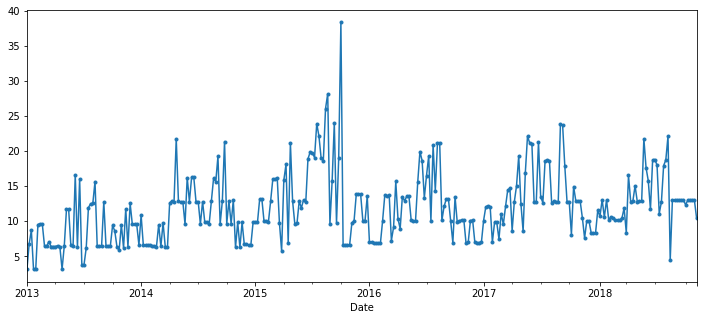

In [4]:
fig = plt.figure(figsize=(12,5))
ax = df_run_dist_wkly.plot(marker='.')
plt.show()